# 6.2 Image Arithmetic

Original


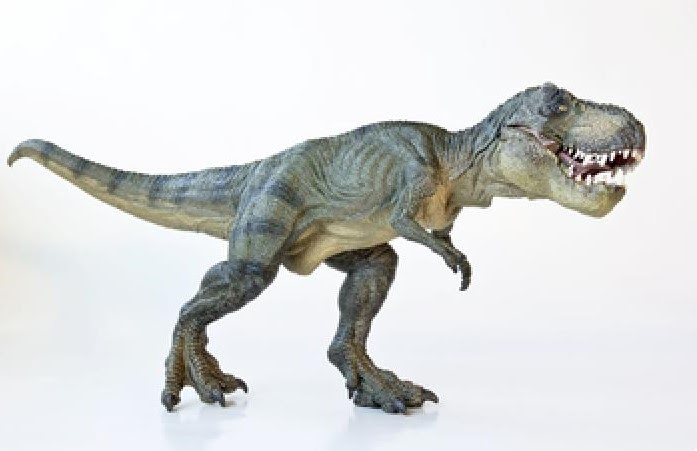

max of 255: [[255]]
min of 0: [[0]]
wrap around: [44]
wrap around: [206]


In [1]:
from __future__ import print_function
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow

ap = argparse.ArgumentParser()
ap.add_argument("-f", "--image", required = True,
help = "Path to the image")
args = vars(ap.parse_args())

image = cv2.imread('trex.png')
print("Original")
cv2_imshow(image)

print("max of 255: {}".format(cv2.add(np.uint8([200]), np.uint8
                                      ([100]))))
print("min of 0: {}".format(cv2.subtract(np.uint8([50]), np.uint8
                                         ([100]))))

print("wrap around: {}".format(np.uint8([200]) + np.uint8([100]))
)
print("wrap around: {}".format(np.uint8([50]) - np.uint8([100])))


Added


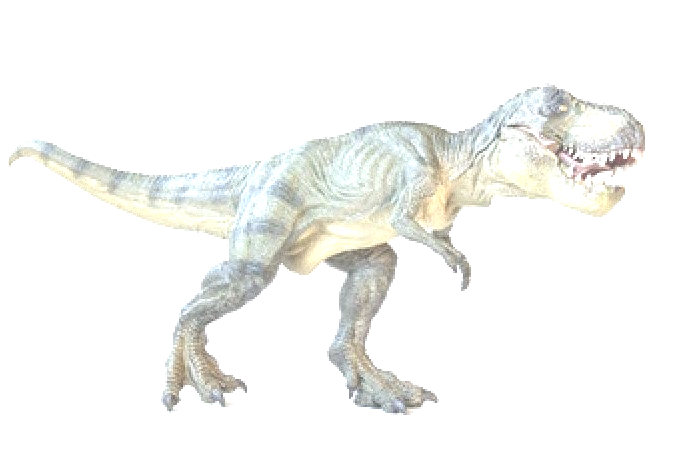

Subtracted


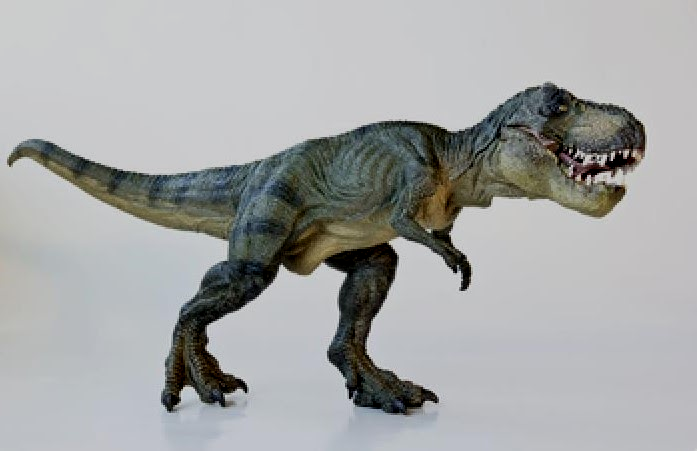

-1

In [2]:
M = np.ones(image.shape, dtype = "uint8") * 100
added = cv2.add(image, M)
print("Added")
cv2_imshow(added)

M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(image, M)
print("Subtracted")
cv2_imshow(subtracted)
cv2.waitKey(0)



In [3]:
# Hàm GrayScale:
#Đầu vào là 1 ảnh bất kỳ:
image = cv2.imread('trex.png')

def grayScale(image):
  newImage = np.zeros(image.shape, dtype = np.uint8)

  height, width, _  = image.shape

  for i in range(height):
    for j in range(width):
      color = image[i, j]
      newImage[i, j] = int(0.299*color[0] + 0.587*color[1] 
                           + 0.114*color[2])                        
  
  return newImage

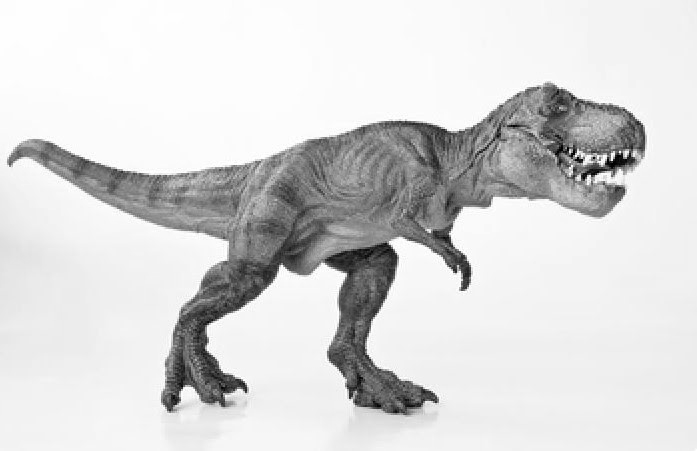

In [4]:
#Đầu ra là 1 ảnh trắng đen
gray_scale =  grayScale(image)
cv2_imshow(gray_scale)

# 6.3 Bitwise Operations

Rectangle


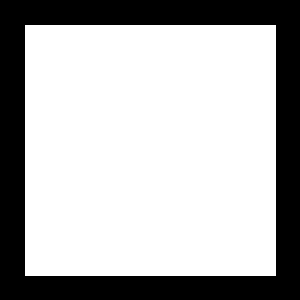

Circle


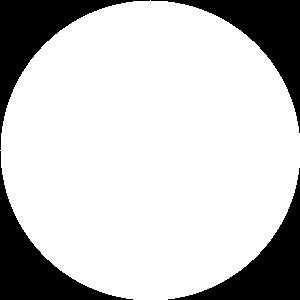

In [5]:
import numpy as np
import cv2

rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
print("Rectangle")
cv2_imshow(rectangle)

circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
print("Circle")
cv2_imshow(circle)


AND


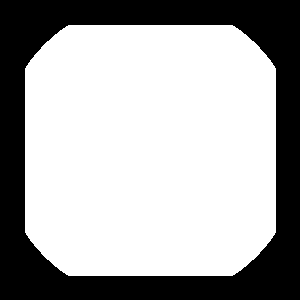

OR


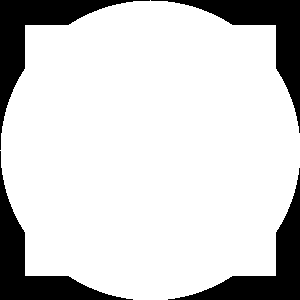

XOR


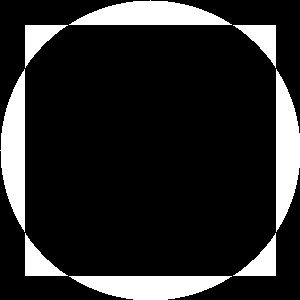

NOT


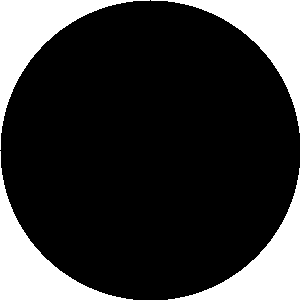

-1

In [6]:
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
print("AND")
cv2_imshow(bitwiseAnd)
cv2.waitKey(0)

bitwiseOr = cv2.bitwise_or(rectangle, circle)
print("OR")
cv2_imshow(bitwiseOr)
cv2.waitKey(0)

bitwiseXor = cv2.bitwise_xor(rectangle, circle)
print("XOR")
cv2_imshow(bitwiseXor)
cv2.waitKey(0)

bitwiseNot = cv2.bitwise_not(circle)
print("NOT")
cv2_imshow(bitwiseNot)
cv2.waitKey(0)

# 6.4 Masking

Original


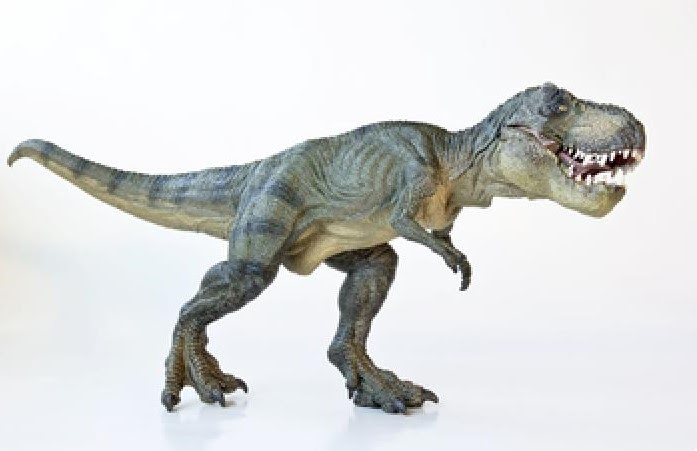

Mask


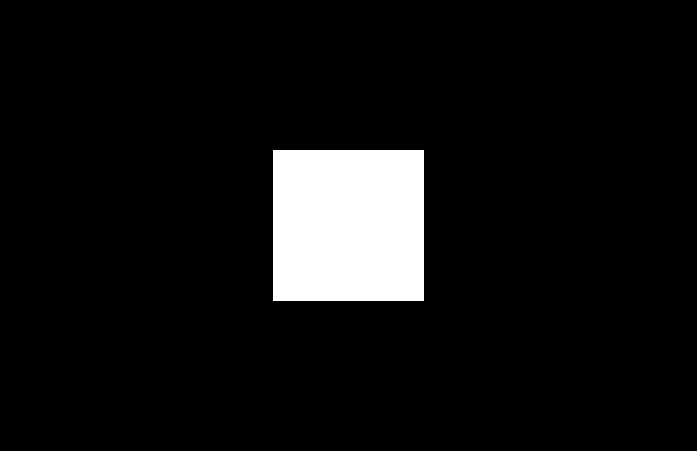

Mask Applied to Image


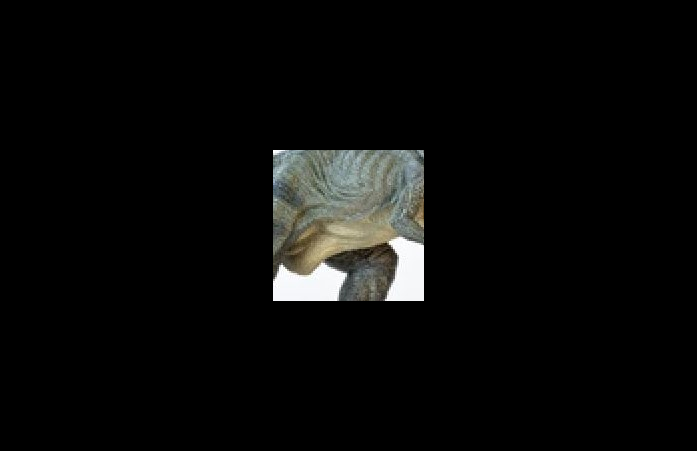

-1

In [7]:
import numpy as np
import argparse
import cv2

ap = argparse.ArgumentParser()
ap.add_argument("-f", "--image", required = True,
                help = "Path to the image")
args = vars(ap.parse_args())

image = cv2.imread('trex.png')
print("Original")
cv2_imshow(image)

mask = np.zeros(image.shape[:2], dtype = "uint8")
(cX, cY) = (image.shape[1] // 2, image.shape[0] // 2)
cv2.rectangle(mask, (cX - 75, cY - 75), (cX + 75 , cY + 75), 255,-1)
print("Mask")
cv2_imshow(mask)

masked = cv2.bitwise_and(image, image, mask = mask)
print("Mask Applied to Image")
cv2_imshow(masked)
cv2.waitKey(0)


Mask


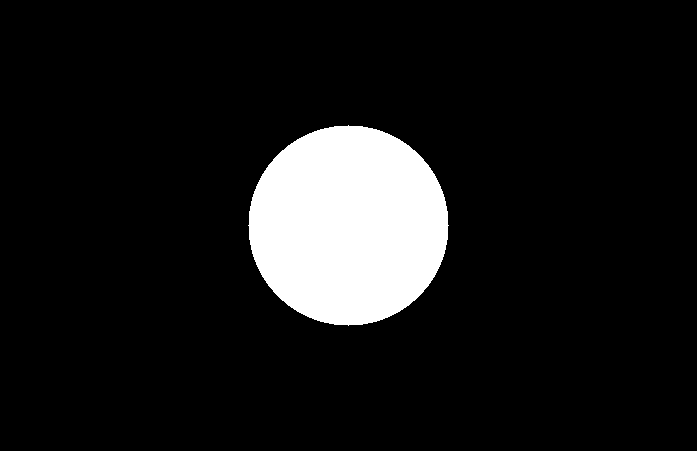

Mask Applied to Image


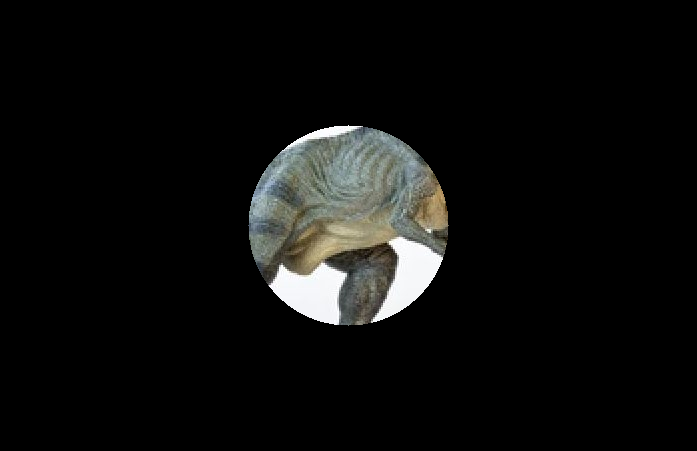

-1

In [8]:
mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.circle(mask, (cX, cY), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask = mask)
print("Mask")
cv2_imshow(mask)
print("Mask Applied to Image")
cv2_imshow(masked)
cv2.waitKey(0)

# 6.5 Splitting and Merging Channels

Red


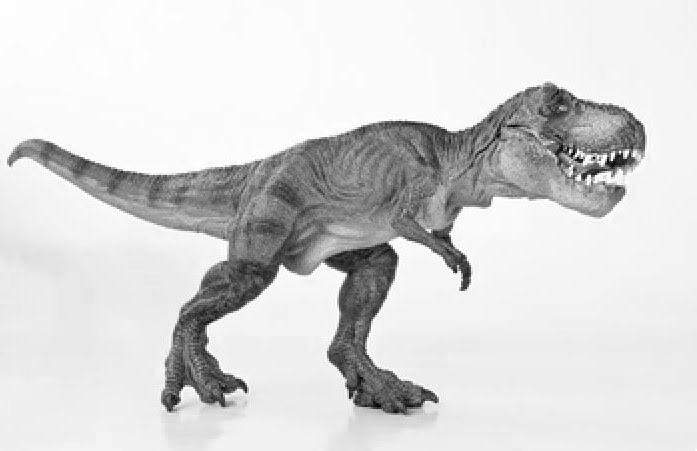

Green


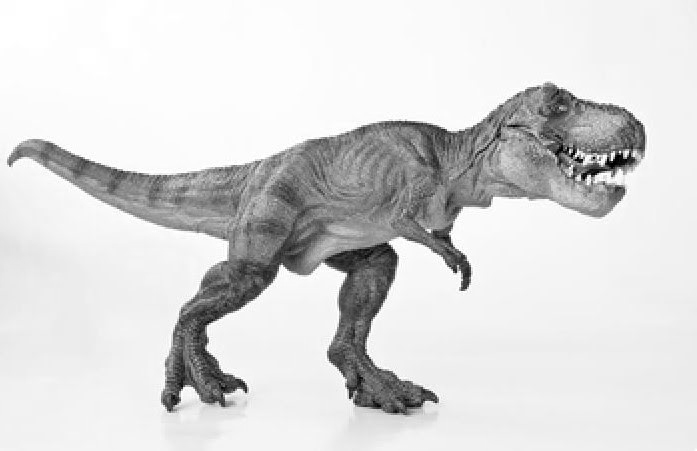

Blue


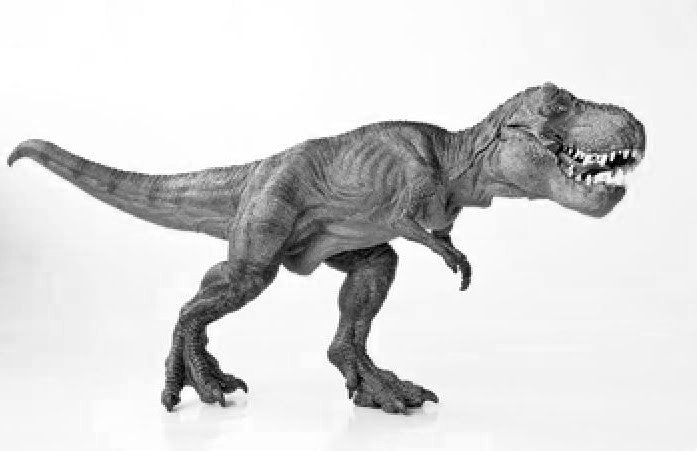

Merged


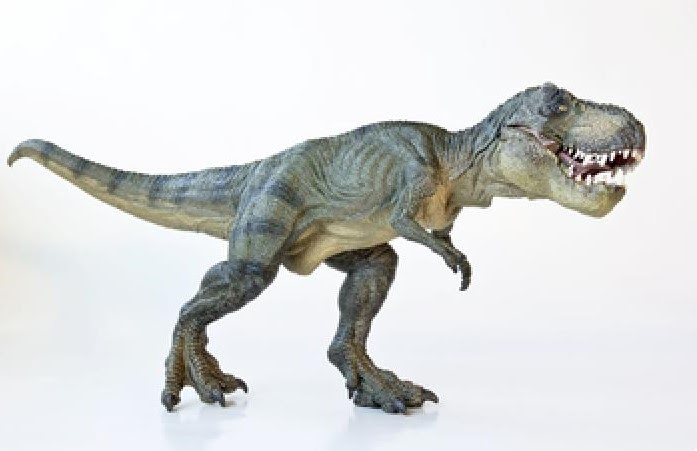

In [9]:
import numpy as np
import argparse
import cv2

ap = argparse.ArgumentParser()
ap.add_argument("-f", "--image", required = True,
                help = "Path to the image")
args = vars(ap.parse_args())

image = cv2.imread('trex.png')
(B, G, R) = cv2.split(image)

print("Red")
cv2_imshow(R)
print("Green")
cv2_imshow(G)
print("Blue")
cv2_imshow(B)
cv2.waitKey(0)

merged = cv2.merge([B, G, R])
print("Merged")
cv2_imshow(merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

Red


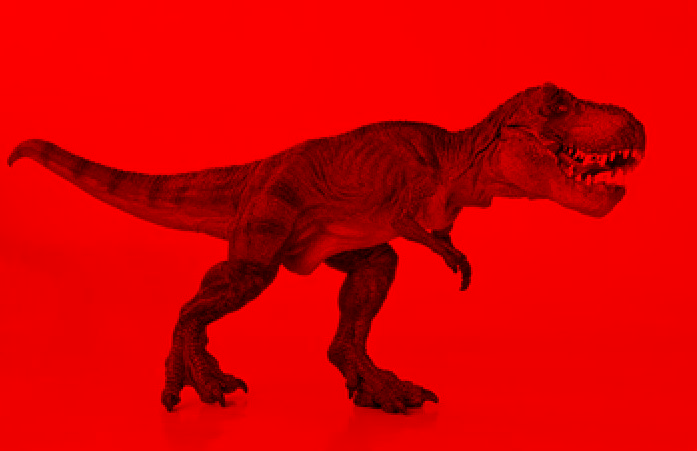

Green


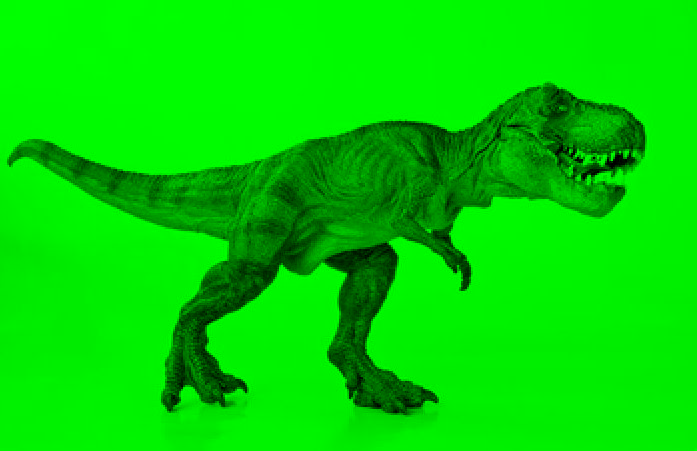

Blue


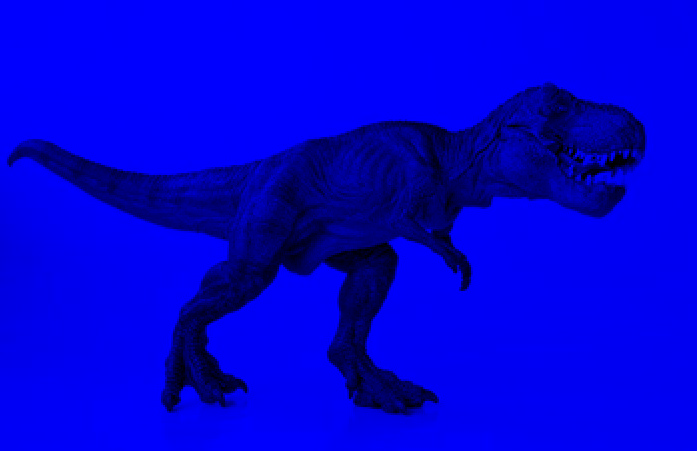

-1

In [10]:
zeros = np.zeros(image.shape[:2], dtype = "uint8")
print("Red")
cv2_imshow(cv2.merge([zeros, zeros, R]))
print("Green")
cv2_imshow(cv2.merge([zeros, G, zeros]))
print("Blue")
cv2_imshow(cv2.merge([B, zeros, zeros]))
cv2.waitKey(0)


# 6.6 Color Spaces

Original


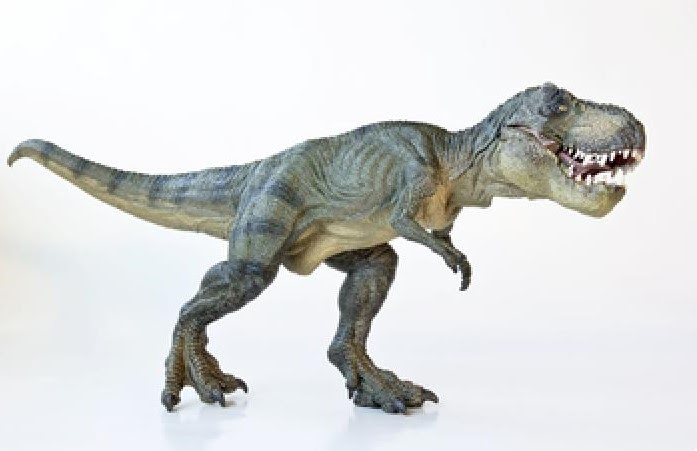

Gray


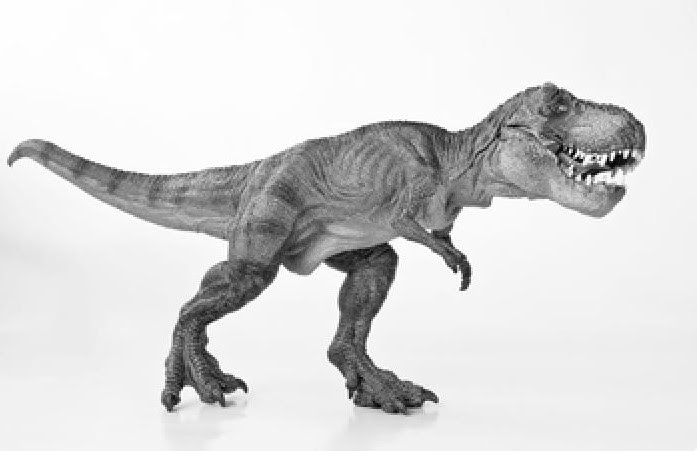

HSV


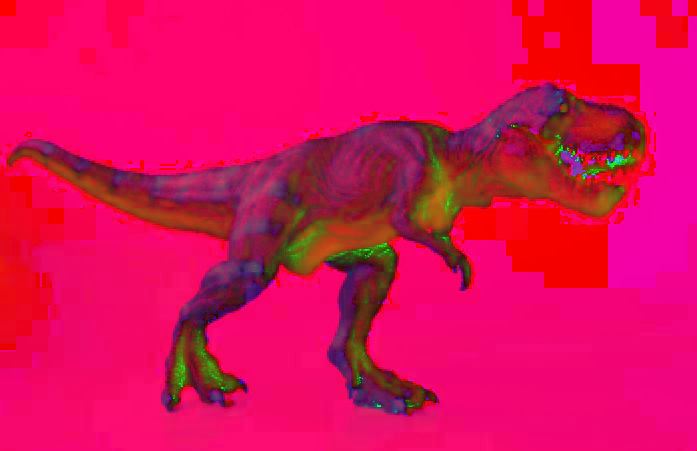

L*a*b*


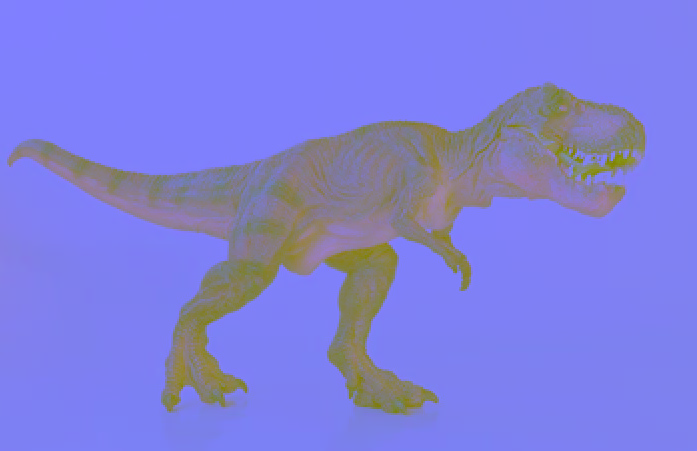

-1

In [11]:
import numpy as np
import argparse
import cv2

ap = argparse.ArgumentParser()
ap.add_argument("-f", "--image", required = True,
                help = "Path to the image")
args = vars(ap.parse_args())

image = cv2.imread('trex.png')
print("Original")
cv2_imshow(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Gray")
cv2_imshow(gray)

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
print("HSV")
cv2_imshow(hsv)

lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
print("L*a*b*")
cv2_imshow(lab)
cv2.waitKey(0)

# C7 Histograms

# 7.2 GrayScale Histograms

Original


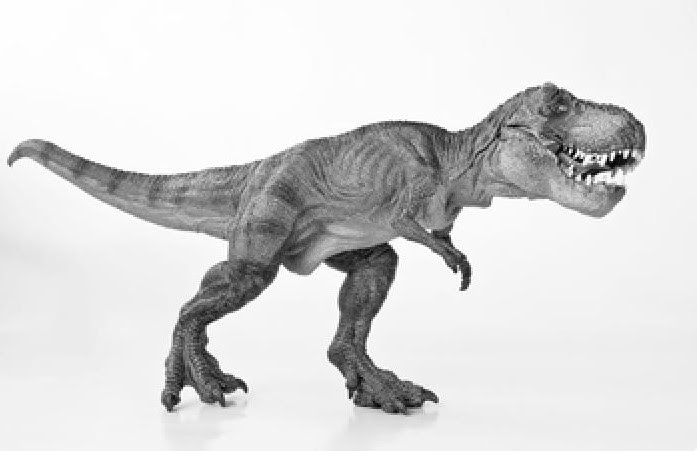

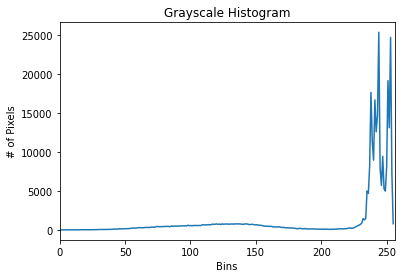

-1

In [12]:
from matplotlib import pyplot as plt
import argparse
import cv2

ap = argparse.ArgumentParser()
ap.add_argument("-f", "--image", required = True,
                help = "Path to the image")
args = vars(ap.parse_args())

image = cv2.imread('trex.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Original")
cv2_imshow(image)

hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()
cv2.waitKey(0)


# 7.3 Color Histograms

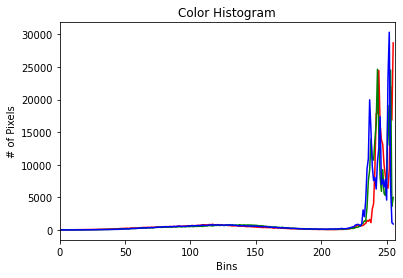

In [57]:
#Code theo numpy và pandas:

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


def colorHistograms(image):
  colors = ("red", "green", "blue")
  channel_ids = (0, 1, 2)

  # create the histogram plot, with three lines, one for
  # each color
  plt.xlim([0, 256])
  for channel_id, color in zip(channel_ids, colors):
      histogram, bin_edges = np.histogram(image[:, :,
                                          channel_id], 
                                          bins=256, 
                                          range=(0, 256))
      draw = plt.plot(bin_edges[0:-1], histogram, color=color)
  return draw

image = cv2.imread('trex.png')
colorHistograms(image)
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

plt.show()




Original


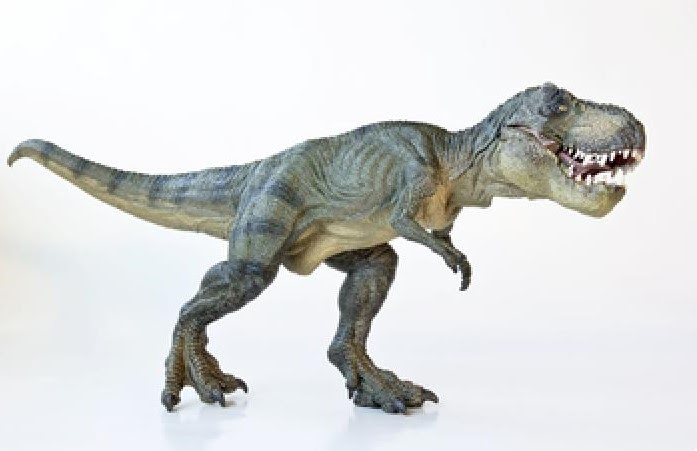

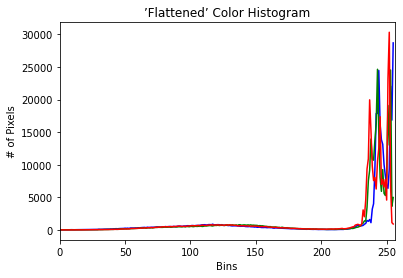

In [36]:
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

ap = argparse.ArgumentParser()
ap.add_argument("-f", "--image", required = True,
                help = "Path to the image")

args = vars(ap.parse_args())
image = cv2.imread('trex.png')
print("Original")
cv2_imshow(image)

chans = cv2.split(image)

colors = ("b", "g", "r")
plt.figure()
plt.title("’Flattened’ Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan, color) in zip(chans, colors):
 hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
 plt.plot(hist, color = color)
 plt.xlim([0, 256])



2D histogram shape: (32, 32), with 1024 values
3D histogram shape: (8, 8, 8), with 512 values


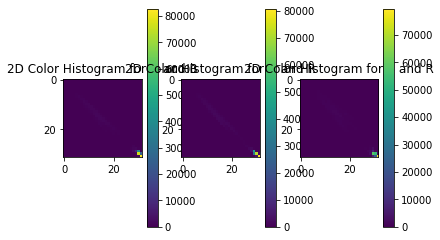

In [21]:
fig = plt.figure()

ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None,
                    [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None,
                    [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None,
                    [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

print("2D histogram shape: {}, with {} values".format(
    hist.shape, hist.flatten().shape[0]))

hist = cv2.calcHist([image], [0, 1, 2],None,
                    [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
    hist.shape, hist.flatten().shape[0]))

plt.show()

# 7.4 Histogram Equalization

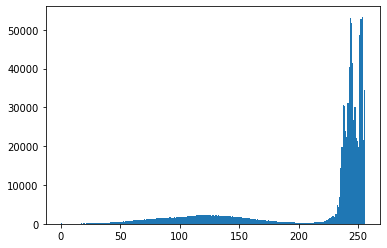

In [58]:
#Code theo numpy và pandas:


image = cv2.imread('trex.png')

plt.hist(image.ravel(),256,[0,256])
plt.show()

Histogram Equalization


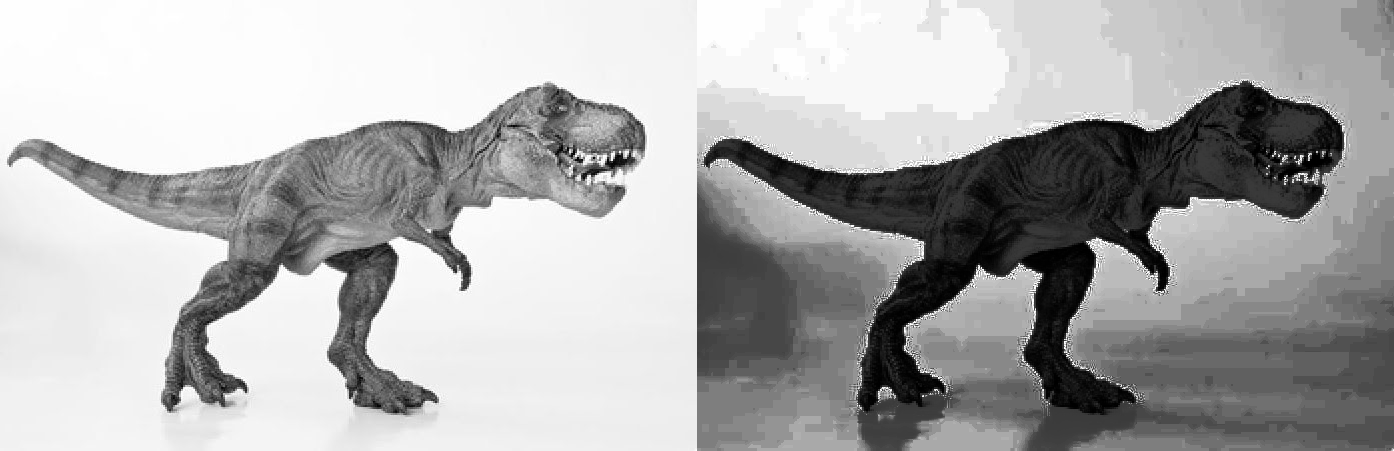

-1

In [56]:
import numpy as np
import argparse
import cv2

ap = argparse.ArgumentParser()
ap.add_argument("-f", "--image", required = True,
help = "Path to the image")
args = vars(ap.parse_args())

image = cv2.imread('trex.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

eq = cv2.equalizeHist(image)

print("Histogram Equalization")
cv2_imshow(np.hstack([image, eq]))
cv2.waitKey(0)


# 7.5 Histograms and Masks

In [18]:
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

def plot_histogram(image, title, mask = None):
 chans = cv2.split(image)
 colors = ("b", "g", "r")
 plt.figure()
 plt.title(title)
 plt.xlabel("Bins")
 plt.ylabel("# of Pixels")

 for (chan, color) in zip(chans, colors):
  hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
  plt.plot(hist, color = color)
  plt.xlim([0, 256])
  

Original


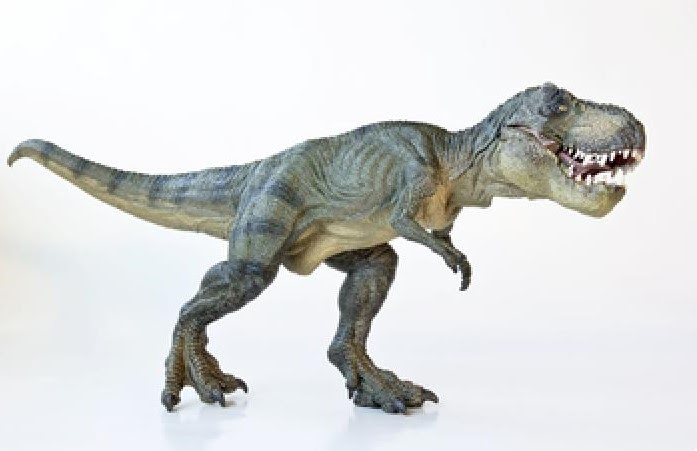

Mask


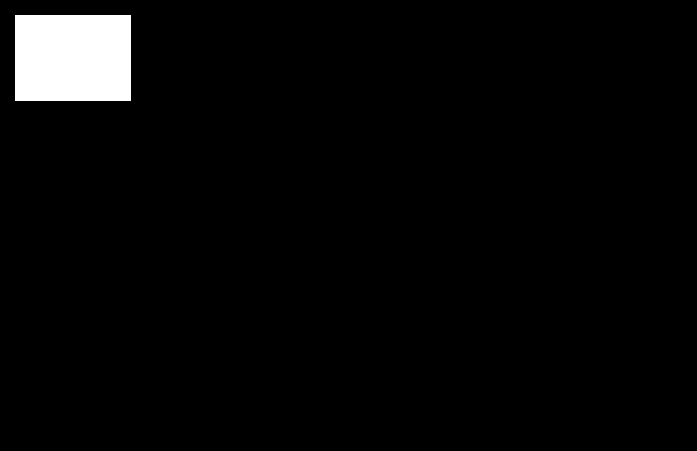

Applying the Mask


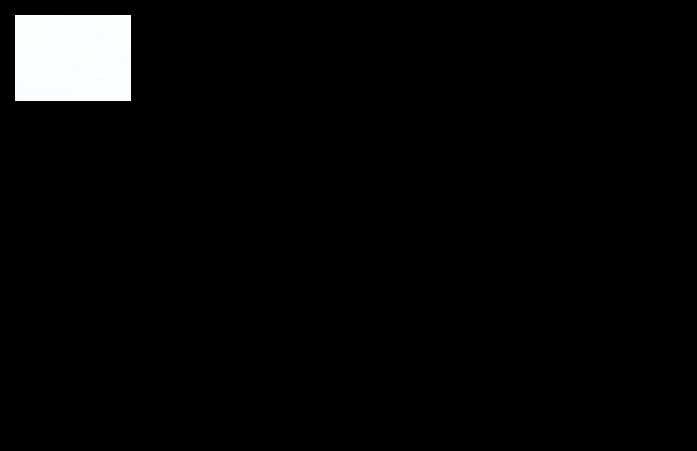

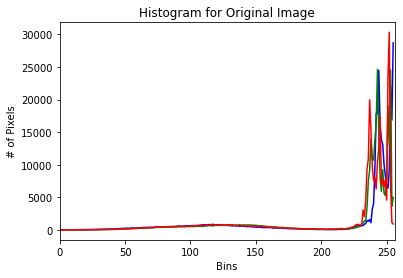

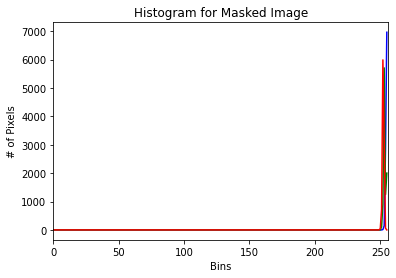

In [19]:
ap = argparse.ArgumentParser()
ap.add_argument("-f", "--image", required = True,
                help = "Path to the image")
args = vars(ap.parse_args())

image = cv2.imread('trex.png')
print("Original")
cv2_imshow(image)
plot_histogram(image, "Histogram for Original Image")

mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.rectangle(mask, (15, 15), (130, 100), 255, -1)
print("Mask")
cv2_imshow(mask)

masked = cv2.bitwise_and(image, image, mask = mask)
print("Applying the Mask")
cv2_imshow(masked)

plot_histogram(image, "Histogram for Masked Image", mask = mask)
plt.show()
